# Final Project: Stat 102

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
# chi = pd.read_csv("chicago.csv")
# ny = pd.read_csv("ny.csv")
# dc = pd.read_csv("dc.csv")
daily = pd.read_csv("day.csv")

In [4]:
print(chi.columns)
print(chi.dtypes)
chi.head()

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
trip_id                int64
starttime             object
stoptime              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0
1,9080521,3/31/2016 22:59,3/31/2016 23:02,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974.0
2,9080479,3/31/2016 22:24,3/31/2016 22:26,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992.0
3,9080475,3/31/2016 22:22,3/31/2016 22:41,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979.0
4,9080443,3/31/2016 22:08,3/31/2016 22:19,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997.0


In [5]:
print(ny.columns)
print(ny.dtypes)
ny.head()

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,839,1/1/2016 00:09:55,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Customer,NaN,0
1,686,1/1/2016 00:21:17,1/1/2016 00:32:44,3143,5 Ave & E 78 St,40.776829,-73.963888,3132,E 59 St & Madison Ave,40.763505,-73.971092,23514,Subscriber,1960.0,1
2,315,1/1/2016 00:33:11,1/1/2016 00:38:26,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3178,Riverside Dr & W 78 St,40.784145,-73.983625,14536,Subscriber,1971.0,1
3,739,1/1/2016 00:40:51,1/1/2016 00:53:11,223,W 13 St & 7 Ave,40.737815,-73.999947,276,Duane St & Greenwich St,40.717488,-74.010455,24062,Subscriber,1969.0,1
4,1253,1/1/2016 00:44:16,1/1/2016 01:05:09,484,W 44 St & 5 Ave,40.755003,-73.980144,151,Cleveland Pl & Spring St,40.722104,-73.997249,16380,Customer,NaN,0


In [6]:
print(dc.columns)
print(dc.dtypes)
dc.head()

Index(['Duration (ms)', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member Type'],
      dtype='object')
Duration (ms)            int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member Type             object
dtype: object


,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,427387,3/31/2016 22:57,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Registered
1,587551,3/31/2016 22:46,3/31/2016 22:56,31105,14th & Harvard St NW,31266,11th & M St NW,W21385,Registered
2,397979,3/31/2016 22:46,3/31/2016 22:53,31634,3rd & Tingey St SE,31108,4th & M St SW,W00773,Registered
3,444282,3/31/2016 22:42,3/31/2016 22:50,31200,Massachusetts Ave & Dupont Circle NW,31201,15th & P St NW,W21397,Registered
4,780875,3/31/2016 22:21,3/31/2016 22:34,31203,14th & Rhode Island Ave NW,31604,3rd & H St NW,W00213,Registered


In [7]:
print(daily.columns)
daily.head()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Question 1.1

### Question 1.1.1
##### Plot the distribution of male to female riders for chicago.csv.

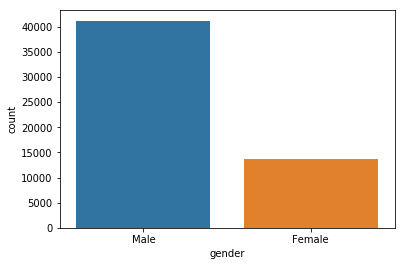

In [8]:
sns.countplot(chi['gender'])

### Question 1.1.2
##### Plot the distribution of the gender column for ny.csv.

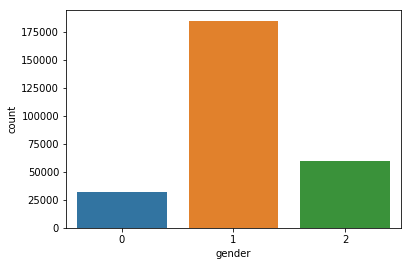

In [9]:
sns.countplot(ny['gender'])

### Question 1.1.3
##### Given the results in Chicago, make an educated guess as to the mapping from numerical value to Male/Female/Unspecified within the ny.csv dataset.

From the above charts, specifically using the Chicago male to female count plot, we can assume that for NYC, the group "1" represents males, the group "2" represents females, and the group "0" either means the gender wasn't recorded or the individual is non-binary.

### Question 1.1.4
##### Plot the distribution of the birth years of bike renters in Chicago and NY.

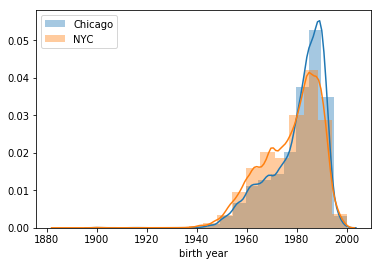

In [10]:
ax = sns.distplot(chi['birthyear'].dropna(), label='Chicago', bins=20)
ax = sns.distplot(ny['birth year'].dropna(), label='NYC', bins=20)
plt.legend()

In [11]:
np.count_nonzero(chi['birthyear'].isna()) / len(chi)

0.23769253164381474

### Question 1.1.5
##### Discuss the results you observed in the age plots and whether this fits with your intuition. Would you remove any data? If so, why?

Looking at the results above, we see that NYC has slightly older riders compared to Chicago. I believe this fits with my intuition because NYC is known as being a start-up/tech-hub, and it is likely that the bike rental idea has been around longer in this area than in Chicago, giving it time to permeate into different target audiences/age groups. In terms of removing data, I believe it depends on what the question at hand is. If we are targeting a particular group in our customer base (millenials, boomers, etc.), then we can remove all groups we aren't interested in. However, I believe we should keep the majority data and potentially remove extreme outliers if it heavily skews our analysis.

# Question 1.2

### Question 1.2.1
##### Plot the three distribution of trip duration in minutes across all three cities.

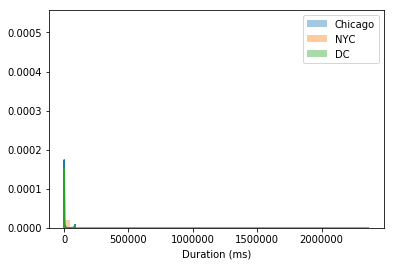

In [12]:
ax = sns.distplot(chi['tripduration'].dropna(), label='Chicago')
ax = sns.distplot(ny['tripduration'].dropna(), label='NYC')
ax = sns.distplot(dc['Duration (ms)'].dropna() / 1000, label='DC')
plt.legend()

In [13]:
print("Chicago max duration:", max(chi['tripduration']))
print("NYC max duration:", max(ny['tripduration']))
print("DC max duration:", int(max(dc['Duration (ms)'] / 1000)))

Chicago max duration: 86365
NYC max duration: 2363758
DC max duration: 85350


### Question 1.2.2
##### Are the plots you generated useful? If not, plot them again so that the visualization is more useful.

From our current visualization, we see that its output is currently uninterpretable. From the print statements above, we can see that NYC has an extreme outlier that is causing this issue. In order to fix this, we have a couple of options. We can eliminate extreme outliers by either using the empirical rule or IQR method. Another option is to set a max threshold from observing the other maximum values, which are hovering around 87-90k seconds. However, we should really think about what 87-90K in seconds is, and if we convert that hours, that is a full day! Since the second option doesn't appear to be a viable option, I will try using the empirical rule.

In addition, from a units stand-point, using seconds as the x-axis really does not help our visualization, as in this business and in everyday life, it is much easier to quantify trips by their time in minutes.

In [14]:
# Lets clean the DC dataframe first by converting the column to seconds and changing its name
dc['Duration (ms)'] = dc['Duration (ms)'] / 1000
dc.rename({'Duration (ms)': 'tripduration'}, inplace=True, axis=1)
dc.head()

,tripduration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,427.387,3/31/2016 22:57,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Registered
1,587.551,3/31/2016 22:46,3/31/2016 22:56,31105,14th & Harvard St NW,31266,11th & M St NW,W21385,Registered
2,397.979,3/31/2016 22:46,3/31/2016 22:53,31634,3rd & Tingey St SE,31108,4th & M St SW,W00773,Registered
3,444.282,3/31/2016 22:42,3/31/2016 22:50,31200,Massachusetts Ave & Dupont Circle NW,31201,15th & P St NW,W21397,Registered
4,780.875,3/31/2016 22:21,3/31/2016 22:34,31203,14th & Rhode Island Ave NW,31604,3rd & H St NW,W00213,Registered


In [15]:
# Now, lets remove outliers using the empirical rule (combining all cities)

all_trips = pd.concat([ny['tripduration'], chi['tripduration'], dc['tripduration']])

mu = np.mean(all_trips)
sd = np.std(all_trips)

lower_bound = 0
upper_bound = mu + 3*sd

lower_bound, upper_bound

(0, 16709.75257390131)

### Plots by themselves

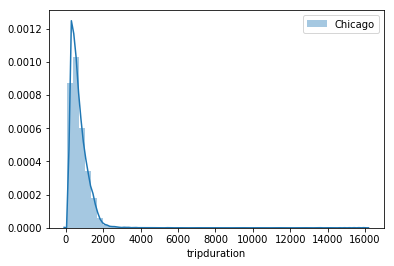

In [16]:
sns.distplot(chi[chi['tripduration'] < upper_bound].dropna()['tripduration'], label='Chicago')
plt.legend()

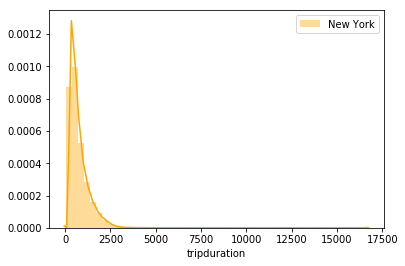

In [17]:
sns.distplot(ny[ny['tripduration'] < upper_bound].dropna()['tripduration'], label='New York', color = 'orange')
plt.legend()

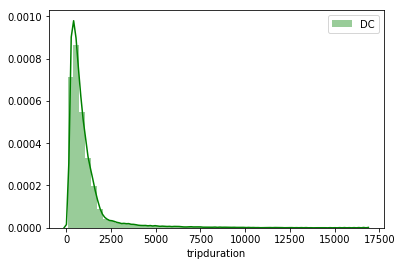

In [18]:
sns.distplot(dc[dc['tripduration'] < upper_bound].dropna()['tripduration'], label='DC', color = 'green')
plt.legend()

### Plots overlayed

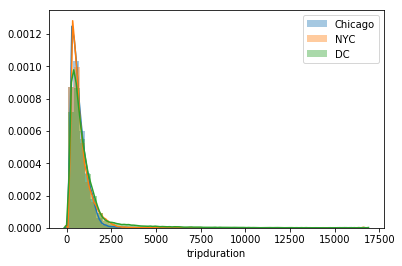

In [19]:
ax = sns.distplot(chi[chi['tripduration'] < upper_bound].dropna()['tripduration'], label='Chicago')
ax = sns.distplot(ny[ny['tripduration'] < upper_bound].dropna()['tripduration'], label='NYC')
ax = sns.distplot(dc[dc['tripduration'] < upper_bound].dropna()['tripduration'], label='DC')
plt.legend()

### Question 1.2.3
##### Plot the start time of trips split by hour for all three cities.

First, I'll be converting the columns to datetimes.

In [20]:
chi['starttime'] = pd.to_datetime(chi['starttime'])
ny['starttime'] = pd.to_datetime(ny['starttime'])
dc['starttime'] = pd.to_datetime(dc['Start date'])

chi['stoptime'] = pd.to_datetime(chi['stoptime'])
ny['stoptime'] = pd.to_datetime(ny['stoptime'])
dc['stoptime'] = pd.to_datetime(dc['End date'])

dc.drop('Start date', axis=1, inplace=True)
dc.drop('End date', axis=1, inplace=True)

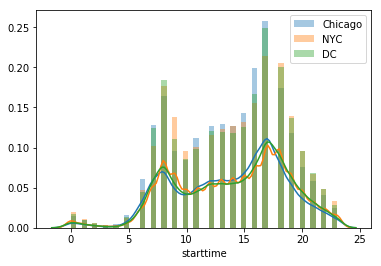

In [21]:
ax = sns.distplot(chi['starttime'].dropna().dt.hour, label='Chicago')
ax = sns.distplot(ny['starttime'].dropna().dt.hour, label='NYC')
ax = sns.distplot(dc['starttime'].dropna().dt.hour, label='DC')
plt.legend()

### Question 1.2.4
##### Discuss the results you observed in the start time plots. Do they fit your intuition?

The plots above do fit my intuition for starttimes. Originally, I believed the following two things would be true:
1. The plots would be nearly identical for all cities
2. The plots would follow spikes that indicate start and end times for Americans' work schedules.

However, one thing that did fit my intuition is that we see more bike rides in the late afternoon than early in the morning. I believe if we split the plots by weekdays and weekends, we'd see two different distributions -- where the weekday plot would have roughly equal proportions of rides in the early morning and late afternoon, whereas weekdays would be slightly different.

# Question 1.3

### Question 1.3.1
##### Visualize three more attributes

#### Visualization #1: Distribution of Daily DC Temperature

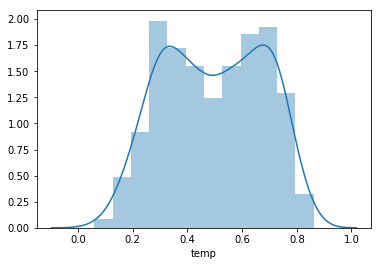

In [22]:
ax = sns.distplot(daily['temp'])

#### Visualization #2: When do long bike rides start? Grouping by hour and getting the average duration for each city.

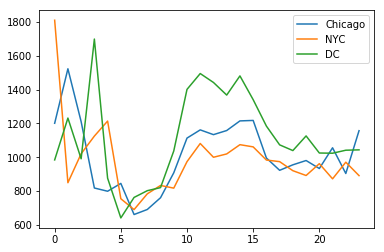

In [23]:
chi['start hour'] = chi['starttime'].dt.hour
ny['start hour'] = ny['starttime'].dt.hour
dc['start hour'] = dc['starttime'].dt.hour

chi_hd = chi[['start hour', 'tripduration']].groupby('start hour').mean().reset_index()
ny_hd = ny[['start hour', 'tripduration']].groupby('start hour').mean().reset_index()
dc_hd = dc[['start hour', 'tripduration']].groupby('start hour').mean().reset_index()

ax = plt.plot(chi_hd['start hour'], chi_hd['tripduration'], label='Chicago')
ax = plt.plot(ny_hd['start hour'], ny_hd['tripduration'], label='NYC')
ax = plt.plot(dc_hd['start hour'], dc_hd['tripduration'], label='DC')
plt.legend()

#### Visualization #3: What are most popular start stations in each city?

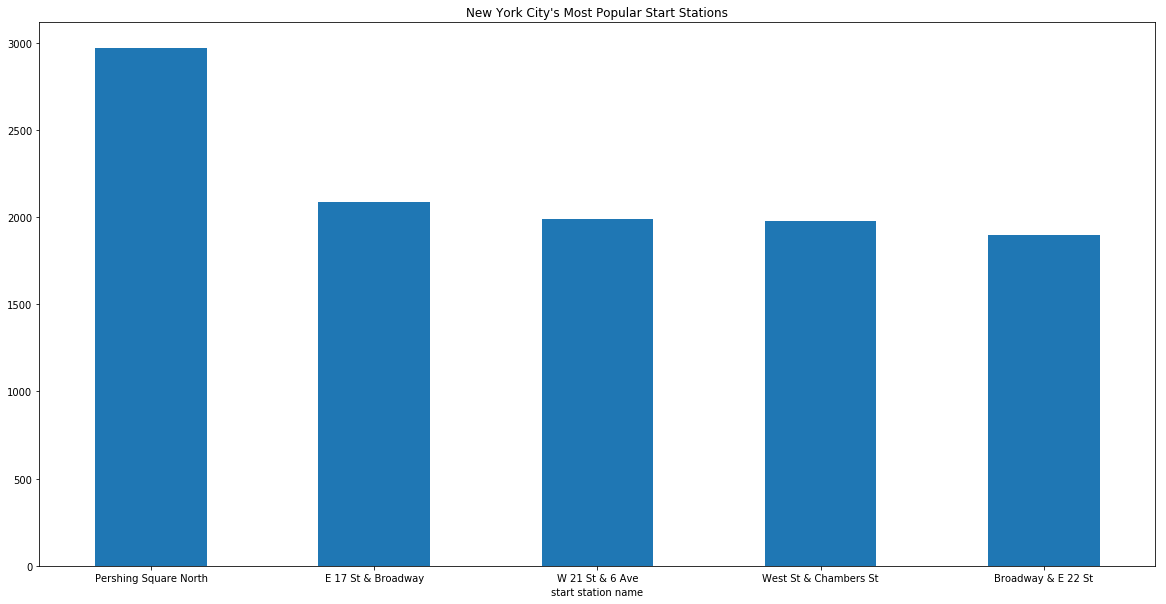

In [24]:
plt.figure(figsize=(20,10))
plt.title("New York City's Most Popular Start Stations")
ny.groupby('start station name').count()['bikeid'].sort_values(ascending=False)[0:5].plot.bar(x='Start Station Name', rot=0)

In [25]:
print(chi.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'start hour'],
      dtype='object')


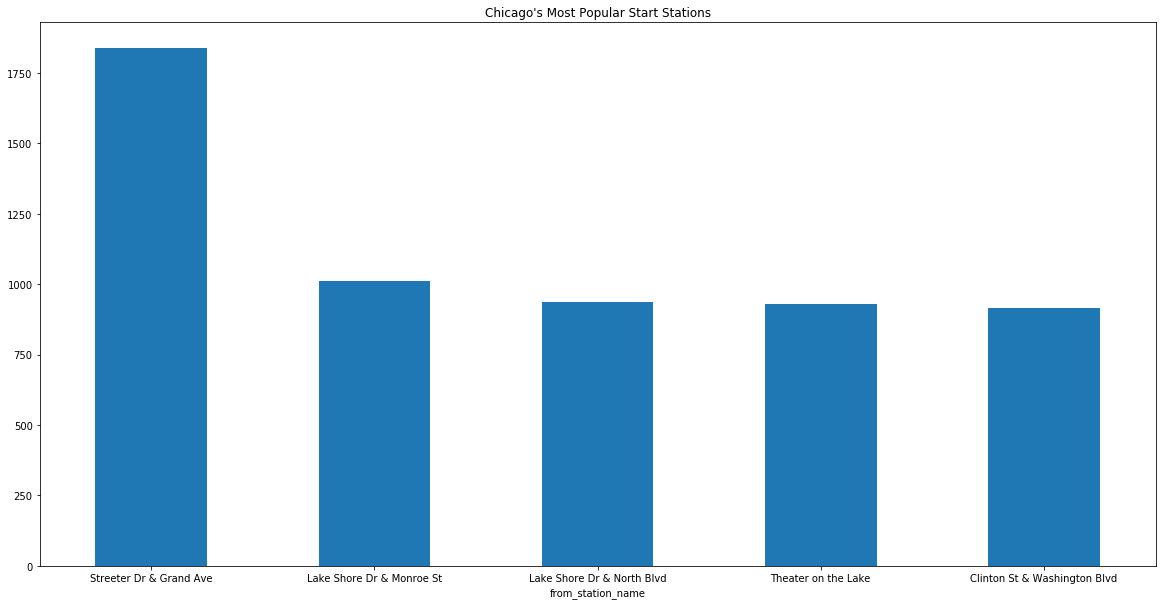

In [26]:
plt.figure(figsize=(20,10))
plt.title("Chicago's Most Popular Start Stations")
chi.groupby('from_station_name').count()['bikeid'].sort_values(ascending=False)[0:5].plot.bar(x='Start Station Name', rot=0)

In [27]:
dc.columns

Index(['tripduration', 'Start station number', 'Start station',
       'End station number', 'End station', 'Bike number', 'Member Type',
       'starttime', 'stoptime', 'start hour'],
      dtype='object')

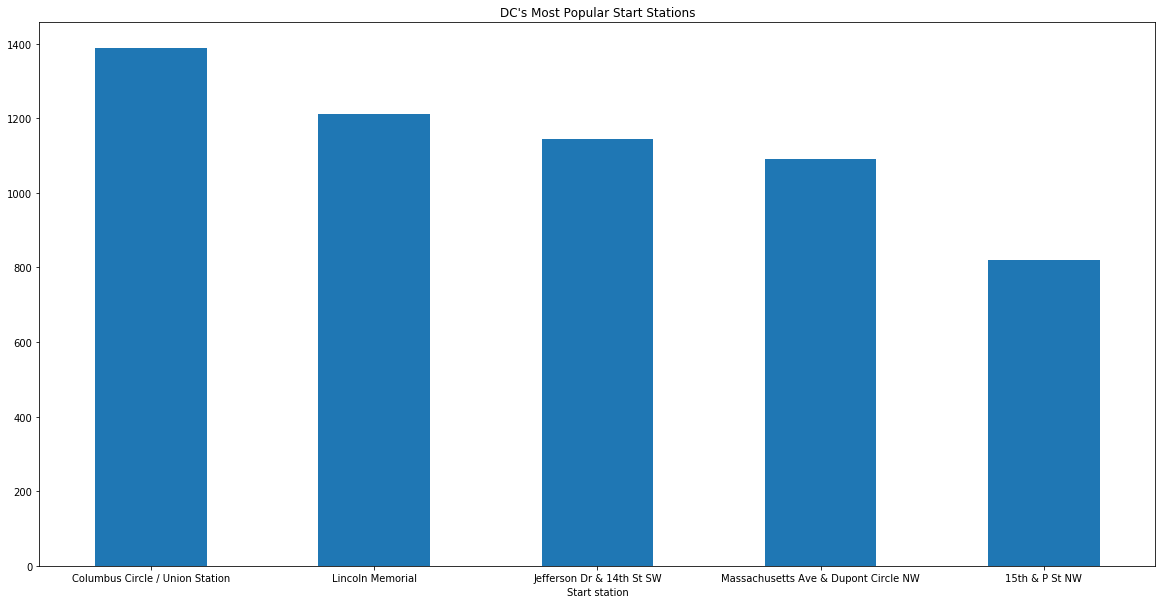

In [28]:
plt.figure(figsize=(20,10))
plt.title("DC's Most Popular Start Stations")
dc.groupby('Start station').count()['Bike number'].sort_values(ascending=False)[0:5].plot.bar(x='Start Station Name', rot=0)

### Question 1.3.2
##### Discuss any insight you obtained from these three new visualizations.

From the above plots, I was able to gain the following insight.

**Visualization 1: Temperature in DC**
In this visualization, we see that the distribution is bimodal, and signals to us that their could be another underlying distribution. My current idea is that it can separate the temperature into two groups: Summer + Fall (the higher temperatures), Winter + Spring (the lower temperatures). This can be a solid indicator when used as a feature in a model.

**Visualization 2: When do long bike rides start?**
Across all 3 cities, we see that the majority of long bike rides usually occur during working hours. I'd potentially like to further explore this visualization and see it broken down by user type. 

**Visualization 3: Most popular start stations for each city**
This visualization overall lets us look at the most popular start stations for each city. This visualization alone can be of great use for companies, especially when it comes to advertising and partnering with companies.

### Question 1.3.3
##### Pick one of the three attribute and plot its distribution if you haven’t already. Explore the data further to get a plausible explanation for the shape of the distribution. For example you could explore whether the attribute is correlated with another attribute.

#### Checking to see if two distributions are at play

In [29]:
daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


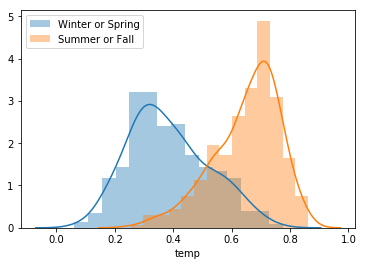

In [30]:
# 0 is winter or spring, 1 is summer or fall

def seasonish(month):
    if month > 5 and month < 11:
        return 1
    return 0

daily['szn'] = daily['mnth'].apply(seasonish)

w_s = daily[daily['szn'] == 0]['temp']
s_f = daily[daily['szn'] == 1]['temp']

ax = sns.distplot(w_s, label='Winter or Spring')
ax = sns.distplot(s_f, label='Summer or Fall')
plt.legend()

#### Checking the correlaiton between temperature and proportion of casual riders

Text(0, 0.5, 'Proportion of Casual Riders')

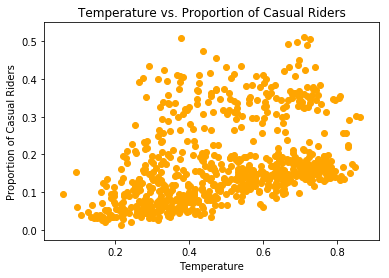

In [31]:
ax = plt.scatter(daily['temp'], daily['casual']/daily['cnt'], color='orange')
plt.title('Temperature vs. Proportion of Casual Riders')
plt.xlabel('Temperature')
plt.ylabel('Proportion of Casual Riders')

#### Checking the correlaiton between temperature and proportion of casual riders, splitting by weekend and week day

In [32]:
daily['Weekend'] = pd.to_datetime(daily['dteday']).dt.dayofweek
daily['Weekend'] = daily['Weekend'].apply(lambda x: 1 if x >= 5 else 0)

Text(0, 0.5, 'Proportion of Casual Riders')

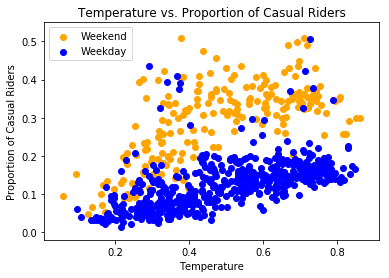

In [33]:
weekend = daily[daily['Weekend'] == 1]
weekday = daily[daily['Weekend'] == 0]

ax = plt.scatter(weekend['temp'], weekend['casual']/weekend['cnt'], color='orange', label='Weekend')
ax = plt.scatter(weekday['temp'], weekday['casual']/weekday['cnt'], color='blue', label='Weekday')
plt.title('Temperature vs. Proportion of Casual Riders')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Proportion of Casual Riders')

### Question 1.3.4
##### Given the insights you obtained from the data, write down a hypothesis that you think is important and how you would go about testing it.

I believe a hypothesis that would be worth testing is whether or not the proportion of casual riders is affected by whether or not it is a weekend or weekday. In order to test this, I would run a random permutation hypothesis test 5000 times with the test statistic being the differences between the proportion of casual riders on weekends and the proportion of casual riders on weekdays.

Null Hypothesis: In the population, the distribution of the proportion of casual riders is the same for weekends as for weekdays. The difference in the sample is due to chance.

Alternative Hypothesis: In the population, the proportion of casual riders on weekends, on average, is greater than the proportion of casual riders on weekdays.

### Question 1.4

In [131]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# Although some rides can start on one day and end on another, we will quantify day as being the starttime
ny_matrix = []
cols = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'casual', 'registered', 'cnt']

ny['day'] = ny['starttime'].dt.date

ny_groups = ny.groupby('day')
    
def workingday(day_num):
    if day_num != 0 and day_num != 6:
        return 1
    return 0

    
dr = pd.date_range(start='2016-01-01', end='2016-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
    

for group in ny_groups:
    dteday = group[0]
    data = group[1]
    month = dteday.month
    if dteday in holidays:
        holiday = 1
    else:
        holiday = 0
    season = (month%12 + 3)//3
    weekday = dteday.weekday()
    working_day = workingday(weekday)
    yr = 0
    casual = len(data[data['usertype'] == 'Customer'])
    registered = len(data[data['usertype'] == 'Subscriber'])
    cnt = casual + registered
    ny_matrix.append([dteday, season, yr, month, holiday, weekday, working_day, casual, registered, cnt])

In [132]:
ny_daily = pd.DataFrame(ny_matrix, columns=cols)
ny_daily.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,casual,registered,cnt
0,2016-01-01,1,0,1,1,4,1,44,161,205
1,2016-01-02,1,0,1,0,5,1,53,254,307
2,2016-01-03,1,0,1,0,6,0,45,275,320
3,2016-01-04,1,0,1,0,0,0,22,402,424
4,2016-01-05,1,0,1,0,1,1,5,345,350


In [133]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# Although some rides can start on one day and end on another, we will quantify day as being the starttime
chi_matrix = []
cols = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'casual', 'registered', 'cnt']

chi['day'] = chi['starttime'].dt.date

chi_groups = chi.groupby('day')
    
def workingday(day_num):
    if day_num != 0 and day_num != 6:
        return 1
    return 0

    
dr = pd.date_range(start='2016-01-01', end='2016-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
    

for group in chi_groups:
    dteday = group[0]
    data = group[1]
    month = dteday.month
    if dteday in holidays:
        holiday = 1
    else:
        holiday = 0
    season = (month%12 + 3)//3
    weekday = dteday.weekday()
    working_day = workingday(weekday)
    yr = 0
    casual = len(data[data['usertype'] == 'Customer'])
    registered = len(data[data['usertype'] == 'Subscriber'])
    cnt = casual + registered
    chi_matrix.append([dteday, season, yr, month, holiday, weekday, working_day, casual, registered, cnt])

In [134]:
dc_daily = pd.DataFrame(chi_matrix, columns=cols)
dc_daily.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,casual,registered,cnt
0,2016-01-01,1,0,1,1,4,1,2,16,18
1,2016-01-02,1,0,1,0,5,1,1,16,17
2,2016-01-03,1,0,1,0,6,0,1,23,24
3,2016-01-04,1,0,1,0,0,0,1,76,77
4,2016-01-05,1,0,1,0,1,1,2,85,87


In [135]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

print(dc.columns)

# Although some rides can start on one day and end on another, we will quantify day as being the starttime
dc_matrix = []
cols = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'casual', 'registered', 'cnt']

dc['day'] = dc['starttime'].dt.date

dc_groups = dc.groupby('day')
    
def workingday(day_num):
    if day_num != 0 and day_num != 6:
        return 1
    return 0

    
dr = pd.date_range(start='2016-01-01', end='2016-12-31')
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
    

for group in dc_groups:
    dteday = group[0]
    data = group[1]
    month = dteday.month
    if dteday in holidays:
        holiday = 1
    else:
        holiday = 0
    season = (month%12 + 3)//3
    weekday = dteday.weekday()
    working_day = workingday(weekday)
    yr = 0
    casual = len(data[data['Member Type'] == 'Casual'])
    registered = len(data[data['Member Type'] == 'Registered'])
    cnt = casual + registered
    dc_matrix.append([dteday, season, yr, month, holiday, weekday, working_day, casual, registered, cnt])

Index(['tripduration', 'Start station number', 'Start station',
       'End station number', 'End station', 'Bike number', 'Member Type',
       'starttime', 'stoptime', 'start hour', 'posterior', 'prediction',
       'day'],
      dtype='object')


In [136]:
dc_daily = pd.DataFrame(dc_matrix, columns=cols)
dc_daily.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,casual,registered,cnt
0,2016-01-01,1,0,1,1,4,1,18,41,59
1,2016-01-02,1,0,1,0,5,1,32,77,109
2,2016-01-03,1,0,1,0,6,0,23,73,96
3,2016-01-04,1,0,1,0,0,0,6,101,107
4,2016-01-05,1,0,1,0,1,1,4,83,87


In [139]:
np.mean(chi_daily['casual'] / chi_daily['registered'])

0.28014207302659266

I chose this exercise because I enjoyed doing these data engineering-esque tasks for my job over the summer.

For my creation procude, I used a variety of creative methods. First, I created a function to assign season with using any boolean checks and instead only used modulo and floor division. Second, I imported holiday dates from the pandas library in order to assign the holiday column. After this, I grouped by the day for all rides and iterated through each group in order to assign their respective values. Overall, I was able to see that in NY was by far the most popular in terms of ride shares per day, but this could obviously be due to its large population. In addition, Chicago's proportion of casual riders to registered riders is very low, as the average ratio between the two was roughly .28.

# Question 2

### Question 2.1
##### Use S1 to train a logistic regression model for predicting Yi from Xi according to the above model. Denote by θ∗ the learned value of θ. Consider using methods available in sklearn.

In [36]:
from sklearn.linear_model import LogisticRegression

features = ['tripduration', 'starttime', 'stoptime']
target = 'User'

def label(user_type):
    if user_type == 'Customer':
        return 0
    return 1

ny['User'] = ny['usertype'].apply(label)

s1, s2, s3 = np.split(ny.sample(frac=1), [int(.6*len(ny)), int(.8*len(ny))])

s1['starttime'] = s1['starttime'].dt.hour
s2['starttime'] = s2['starttime'].dt.hour
s3['starttime'] = s3['starttime'].dt.hour

s1['stoptime'] = s1['stoptime'].dt.hour
s2['stoptime'] = s2['stoptime'].dt.hour
s3['stoptime'] = s3['stoptime'].dt.hour

X_s1, y_s1 = s1[features], s1[target]
X_s2, y_s2 = s2[features], s2[target]
X_s3, y_s3 = s3[features], s3[target]

In [37]:
clf = LogisticRegression()
clf.fit(X_s1, y_s1)

theta_star = clf.coef_

/Users/tannerarrizabalaga/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Question 2.2
##### Plot two histograms: one of null p-values (Yi = 0, casual riders) and one of non-null p-values (Yi = 1, non-casual riders). What do you observe?

In [38]:
s2_probs = pd.DataFrame(clf.predict_proba(X_s2)[:, 1])
s2_probs.index = X_s2.index
s3_probs = pd.DataFrame(clf.predict_proba(X_s3)[:, 1])
s3_probs.index = X_s3.index

full_set = np.append(features, target)
s2_cas = s2[full_set]
s2_cas = s2_cas[s2_cas['User'] == 0]

In [150]:
# Run later, takes too long
s2_cas_probs = clf.predict_proba(s2_cas[features])

s2_cas_card = len(s2_cas)

casual_p_values = []

for s_j in s3_probs[0]:
    comparisons = np.count_nonzero(s2_cas_probs[:, 1] > s_j)
    #comparisons = [1 if s_i > s_j else 0 for s_i in s2_cas_probs[:, 1]]
    casual_p_values.append(np.sum(comparisons)/s2_cas_card)

(array([15807.,  5595.,  5512.,  6188.,  6404.,  5370.,  3437.,  2707.,
         2858.,  1482.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

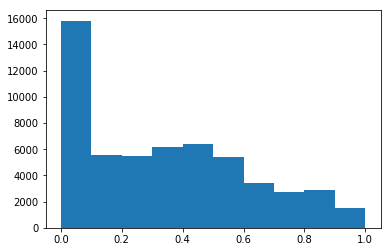

In [40]:
plt.hist(casual_p_values)

In [41]:
cas_pval_pd = pd.DataFrame([casual_p_values, y_s3]).T

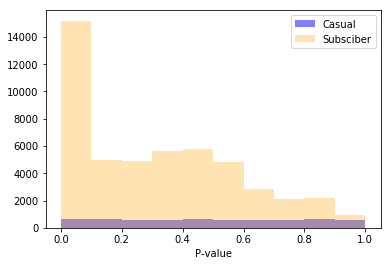

In [42]:
fig, ax = plt.subplots()

ax.hist(cas_pval_pd[cas_pval_pd[1] == 0][0], color='blue', label='Casual', alpha=0.5)
ax.hist(cas_pval_pd[cas_pval_pd[1] == 1][0], color='orange', label='Subsciber', alpha=0.3)
ax.legend()
plt.xlabel('P-value')
plt.show()

### Question 2.3
##### Run the Benjamini-Hochberg algorithm under level 0.2 on these p-values, and compute the false discovery proportion (FDP) and sensitivity. Report the average FDP and sensitivity over these 200 trials. Is the average FDP above or below 0.2? Can you explain why it is or isn’t?

In [175]:
def benjamini_hochberg(p_values, alpha, labels):
    # returns decisions: a binary vector of the same length as p-values, 
    # where decisions[i] is 1 if p_values[i] is deemed significant at level alpha, and 0 otherwize
    
    # TODO: fill in
    p = np.sort(p_values)
    n = len(p)
    output = []
    for k in np.arange(n):
        if p[k] <= k*(alpha/n):
            output.append(k)
    if len(output) == 0:
        return []
    threshold = max(output)
    decisions = p_values <= p[threshold]
    
    n01, n11, n10 = 0, 0, 0
    
    for i in np.arange(len(decisions)):
        if decisions[i] == 1 and labels[i] == 1:
            n11 += 1
        elif decisions[i] == 1 and labels[i] == 0:
            n01 += 1
        elif decisions[i] == 0 and labels[i] == 1:
            n10 += 1
    
    fdp = n01 / (n01 + n11)
    sens = n11 / (n10 + n11)
    
    return fdp, sens

fdr_vals = []
sens_vals = []

for trial in range(200):
    #Split data
    s1, s2, s3 = np.split(ny.sample(frac=1), [int(.6*len(ny)), int(.8*len(ny))])

    s1['starttime'] = s1['starttime'].dt.hour
    s2['starttime'] = s2['starttime'].dt.hour
    s3['starttime'] = s3['starttime'].dt.hour

    s1['stoptime'] = s1['stoptime'].dt.hour
    s2['stoptime'] = s2['stoptime'].dt.hour
    s3['stoptime'] = s3['stoptime'].dt.hour

    X_s1, y_s1 = s1[features], s1[target]
    X_s2, y_s2 = s2[features], s2[target]
    X_s3, y_s3 = s3[features], s3[target]
    
    #Train LogisticRegression model
    clf = LogisticRegression(solver='lbfgs')
    clf.fit(X_s1, y_s1)
    
    #Get s2, s2_0, and s3 probabilities
    s2_probs = pd.DataFrame(clf.predict_proba(X_s2)[:, 1])
    s2_probs.index = X_s2.index
    s3_probs = pd.DataFrame(clf.predict_proba(X_s3)[:, 1])
    s3_probs.index = X_s3.index

    full_set = np.append(features, target)
    s2_cas = s2[full_set]
    s2_cas = s2_cas[s2_cas['User'] == 0]
    
    s2_cas_probs = clf.predict_proba(s2_cas[features])

    #Populate casual p values
    s2_cas_card = len(s2_cas)

    casual_p_values = []

    for s_j in s3_probs[0]:
        comparisons = np.count_nonzero(s2_cas_probs[:, 1] > s_j)
        # comparisons = [1 if s_i > s_j else 0 for s_i in s2_cas_probs[:, 1]]
        casual_p_values.append(np.sum(comparisons)/s2_cas_card)
        
    #Find sensitivity and FDR
    cas_pval_pd = pd.DataFrame([casual_p_values, y_s3]).T
    cas_pval_pd.columns = ['p-value', 'label']
    
    fdr, sens = benjamini_hochberg(cas_pval_pd['p-value'].values, .2, cas_pval_pd['label'].values)
    fdr_vals.append(fdr)
    sens_vals.append(sens)
    
print(np.mean(fdr_vals), np.mean(sens_vals))

0.040811294962274355 0.011967491585655823


From the above, we see that our average FDR for our trials .04 (below .2) while our average sensitivity was roughly .01. The main reason why our average FDR is below .2 is because of the core functionalities of the BH procedure. As we proved in a previous homework, BH controls FDR under level $\alpha$, and since we chose $\alpha$ to be .2, we obtained an average FDR below that level.

# Question 3

### Question 3.1
##### Describe why it is reasonable to believe that should be a difference in the distributions of trip durations of subscribers and non-subscribed customers. Use figures from the data to back up your argument.

It is reasonable to believe that there should be a difference in trip duration distributions because usually, the casual driver will convert to becoming a subscribed rider for one (or a couple) specific reason(s). The main two reasons that come to mind are the following: 1. the rider wants a better experience overall and/or 2. the rider uses the service very often and wants a reduction in cost. The first reason is not possible for this dataset, as both casual and subscribed riders receive the same bike, but the second reason is very likely -- especially for those who bike to work everyday.

On the same point of motivations behind conversion, some riders may want to stay casual because there is no need for them to use a bike on a constant basis. Maybe they just want to bike as a hoby/leisure activity, and this line of thought is well-supported by the data, as casual riders tend to have longer rides while subscribed riders have shorter drives (likely that subscribed bikers are riding to work, where the duration shuold not be long).

Casual Mean & Standard Deviation in Seconds: (1373.470431809548, 707.2077323303444)
Subscriber Mean & Standard Deviation in Seconds: (684.2110936815993, 435.4769085681167)


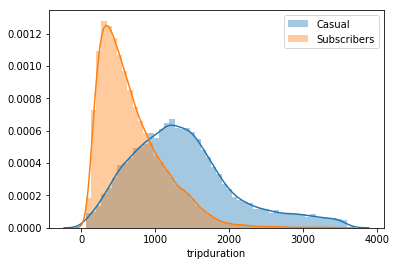

In [50]:
cust_time = chi[(chi['tripduration'] < 3600) & (chi['usertype'] == 'Customer')]['tripduration'].dropna()
sub_time = chi[(chi['tripduration'] < 3600) & (chi['usertype'] == 'Subscriber')]['tripduration'].dropna()

ax = sns.distplot(cust_time, label='Casual')
ax = sns.distplot(sub_time, label='Subscribers')
plt.legend()

print("Casual Mean & Standard Deviation in Seconds:", (np.mean(cust_time), np.std(cust_time)))
print("Subscriber Mean & Standard Deviation in Seconds:", (np.mean(sub_time), np.std(sub_time)))

### Question 3.2
##### Use the Expectation-Maximization (E-M) Algorithm to learn a mixture of two Gaussians that describes the distribution trip-durations of length less than one hour in the chicago.csv dataset. Run this multiple times from different initializations. Do your results change drastically depending on the initialization? What are the means and variances of the fitted Gaussians?

In [54]:
sigma_0 = 435
sigma_1 = 707

def gmm_expectation_maximization(data, pi_0, mu_0, pi_1, mu_1, num_steps):
    """ Perform expectation maximization assuming a Gaussian mixture model consisting of two Gaussians.
    
    Parameters
    ----------
    data : numpy array of shape n
        The matrix of datapoints we've observed.
    pi_0 : float
        Our initial estimate of pi_0.
    mu_0 : float
        Our initial estimate of mu_0.
    pi_1 : float
        Our initial estimate of pi_1.
    mu_1 : float
        Our initial estimate of mu_1.
    num_steps : int
        The number of times to run the expectation maximization.
    """
    print(pi_0, mu_0, pi_1, mu_1)
    for step in range(num_steps):
        # First run the expectation step.
        gaussian_prob_0 = (np.exp(-(data - mu_0) ** 2 / (2 * sigma_0)) /
                           (np.sqrt(2 * np.pi) * sigma_0))
        gaussian_prob_1 = (np.exp(-(data - mu_1) ** 2 / (2 * sigma_1)) /
                           (np.sqrt(2 * np.pi) * sigma_1))
        normalizing_factor = pi_0 * gaussian_prob_0 + pi_1 * gaussian_prob_1
        # z_k is the vector of estimated probabilities that each datapoint i
        # belongs to the distribution k. In other words the ith index is an
        # estimate of P(K=k|x_i).
        z_0 = pi_0 * gaussian_prob_0 / normalizing_factor
        z_1 = pi_1 * gaussian_prob_1 / normalizing_factor
        
        # Now run the maximization step.
        # N_k is the estimated number of points assigned to the distribution k.
        N_0 = np.sum(z_0)
        N_1 = np.sum(z_1)
        pi_0 = N_0 / data.shape[0]
        pi_1 = N_1 / data.shape[0]
        mu_0 = np.sum(data*z_0)/np.sum(z_0)
        mu_1 = np.sum(data*z_1)/np.sum(z_1)
        
    return pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1

In [56]:
one_hour = chi[chi['tripduration'] < 3600]['tripduration']

pi_0, mu_0, sigma_0, pi_1, mu_1, sigma_1 = gmm_expectation_maximization(data=one_hour,
                                                                        pi_0= .8,
                                                                        mu_0= 650,
                                                                        pi_1= .2,
                                                                        mu_1= 1400,
                                                                        num_steps=100)

# Print the estimated parameters for both distributions.
print('---Running with the initial params---')
print("pi_0=.3, mu_0=800, sigma_0=479.38 | pi_1=.7, mu_1=2000, sigma_1=1284.82")
print("---Distribution 0 Estimated Parameters---")
print("pi_0={:.4f}, mu_0={:.2f}, sigma_0={:.2f}".format(pi_0, mu_0, sigma_0))
print("---Distribution 1 Estimated Parameters---")
print("pi_1={:.4f}, mu_1={:.2f}, sigma_1={:.2f}".format(pi_1, mu_1, sigma_1))

0.8 650 0.2 1400
---Running with the initial params---
pi_0=.3, mu_0=800, sigma_0=479.38 | pi_1=.7, mu_1=2000, sigma_1=1284.82
---Distribution 0 Estimated Parameters---
pi_0=0.5873, mu_0=456.20, sigma_0=435.00
---Distribution 1 Estimated Parameters---
pi_1=0.3843, mu_1=1275.49, sigma_1=707.00


From the several initilizations I ran, our results do not change drastically at all -- in fact, no matter what initial values I gave, the GMM return the same estimated parameteres every time. I believe this is because our number of steps was really high for such a small dataset. The fitted mean and variance for distribution 0 was 456.20 and 435.00 respecitively, and the fitted mean and variance for distribution 1 was 1275.49 and 707.00 respectively.

### Question 3.3
##### Given the output of the E-M Algorithm, which of the distributions captures the behavior of the subscribed customers? For each customer, in the dataset, calculate the posterior probability that the customer is from this distribution.

Given the output of the E-M algorithm, it appears that distribution 0 captures the behavior of a subscribed customer.

In [63]:
import scipy.stats

def posterior_prob(x):
    return (0.5873 * scipy.stats.norm.pdf(x, 456.20, 435)) / ((0.5873 * scipy.stats.norm.pdf(x, 456.20, 435)) + (0.3843 * scipy.stats.norm.pdf(x, 1275.49, 707)))

chi['posterior'] = chi['tripduration'].apply(posterior_prob)

In [64]:
chi.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start hour,posterior
0,9080545,2016-03-31 23:30:00,2016-03-31 23:46:00,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0,23,0.610348
1,9080521,2016-03-31 22:59:00,2016-03-31 23:02:00,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,Male,1974.0,22,0.869322
2,9080479,2016-03-31 22:24:00,2016-03-31 22:26:00,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,Female,1992.0,22,0.874848
3,9080475,2016-03-31 22:22:00,2016-03-31 22:41:00,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,Female,1979.0,22,0.384760
4,9080443,2016-03-31 22:08:00,2016-03-31 22:19:00,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,Female,1997.0,22,0.766419


### Question 3.4
##### If you design a classifier which classifies a customer as a Subscriber if their posterior probability is greater that 0.5, what is the error of this classifier given the true User Types in the chicago.csv dataset?

In [72]:
def chi_classify(posterior):
    if posterior > .5:
        return 'Subscriber'
    else:
        return 'Customer'
    
chi['prediction'] = chi['posterior'].apply(chi_classify-)

In [85]:
print("Error:", 1 - (np.count_nonzero(chi['usertype'] == chi['prediction']) / len(chi)))

Error: 0.21673067058546258


### Question 3.5
##### Use the classifier derived from the chicago.csv dataset on the ny.csv and dc.csv datasets. How does this classifier perform? How does the performance compare to that in the previous part? (Make sure that the data for each city is in comparable units.)

In [86]:
dc.head()

,tripduration,Start station number,Start station,End station number,End station,Bike number,Member Type,starttime,stoptime,start hour,posterior,prediction
0,427.387,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Registered,2016-03-31 22:57:00,2016-03-31 23:04:00,22,0.835772,Registered
1,587.551,31105,14th & Harvard St NW,31266,11th & M St NW,W21385,Registered,2016-03-31 22:46:00,2016-03-31 22:56:00,22,0.792097,Registered
2,397.979,31634,3rd & Tingey St SE,31108,4th & M St SW,W00773,Registered,2016-03-31 22:46:00,2016-03-31 22:53:00,22,0.841722,Registered
3,444.282,31200,Massachusetts Ave & Dupont Circle NW,31201,15th & P St NW,W21397,Registered,2016-03-31 22:42:00,2016-03-31 22:50:00,22,0.832093,Registered
4,780.875,31203,14th & Rhode Island Ave NW,31604,3rd & H St NW,W00213,Registered,2016-03-31 22:21:00,2016-03-31 22:34:00,22,0.705987,Registered


In [87]:
def ny_classify(posterior):
    if posterior > .5:
        return 'Subscriber'
    else:
        return 'Customer'
    
def dc_classify(posterior):
    if posterior > .5:
        return 'Registered'
    else:
        return 'Casual'
    
# New york prediction
ny['posterior'] = ny['tripduration'].apply(posterior_prob)
ny['prediction'] = ny['posterior'].apply(ny_classify)

# New york prediction
dc['posterior'] = dc['tripduration'].apply(posterior_prob)
dc['prediction'] = dc['posterior'].apply(dc_classify)

In [88]:
print("NYC Error:", 1 - (np.count_nonzero(ny['usertype'] == ny['prediction']) / len(ny)))
print("DC Error:", 1 - (np.count_nonzero(dc['Member Type'] == dc['prediction']) / len(dc)))

NYC Error: 0.22804716797086688
DC Error: 0.20954075324910293


Overall, the classifier performs surprisingly well. In particular, we see that for Chicago the error is roughly .21, where for DC, the error is closer to .2, which is a surprising result since we trained on Chicago. With this being said, we can assume consumer behaviors (and, potentially, the physical landscapes of the cities) are similar across all 3 cities since there errors are all roughly the same.

# Question 4

In [100]:
daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,szn,Weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0


### Question 4.1.1.1
##### Draw the graph of the causal model, with arrows between variables to denote causality. Your graph should include the following variables: temperature, weathersit, humidity, and number of rentals.

In [176]:
!pip install causalgraphicalmodels

In [177]:
from causalgraphicalmodels import CausalGraphicalModel

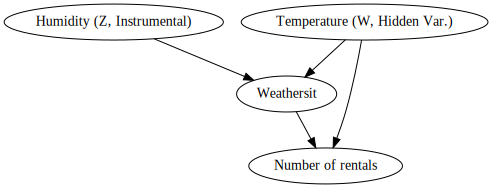

In [178]:
causal_model = CausalGraphicalModel(
    nodes=["Temperature (W, Hidden Var.)", "Humidity (Z, Instrumental)", "Weathersit", "Number of rentals"],
    edges=[
        ("Temperature (W, Hidden Var.)", "Weathersit"), 
        ("Temperature (W, Hidden Var.)", "Number of rentals"), 
        ("Humidity (Z, Instrumental)", "Weathersit"),
        ("Weathersit", "Number of rentals")
    ]
)

causal_model.draw()

### Question 4.1.1.2
##### Clearly describe the assumptions necessary for 2SLS analysis. For any assumptions you can check with the data set, do so. For the remainder of the assumptions, give your best guess as to whether they hold given the problem setting, and discuss how you would test them (this could mean collecting more data).

The necessary assumptions in order to perform a 2SLS analysis is that 1. all observations are independent of each other and 2. error terms will follow a normal distribution.

In [225]:
#Humidity and Temperature should be uncorrelated
ht_corr = np.corrcoef(daily['hum'], daily['temp'])
print("Correlation between humidity and temperature", ht_corr[0,1])

#Humidity and Number of rentals should be uncorrelated
hc_corr = np.corrcoef(daily['hum'], daily['cnt'])
print("Correlation between humidity and count", hc_corr[0,1])

Correlation between humidity and temperature 0.1269629390271887
Correlation between humidity and count -0.10065856213715531


### Question 4.1.2.1
##### Describe the 2SLS procedure, as it applies to the variables above. Describe the procedure at a level such that someone who has taken DS100, but not DS102, would be able to reproduce the analysis (without looking at your code).

2SLS is built on top of the one-stage OLS method. For the 2SLS procedure, we run it in 2 stages. The first step is to see the first stage effect the instrument (Humidity) has on the treatment (Number of rentals). We then use this result to split the treament into two parts: one part that explains the treatment by the instrument, and another part explained by all other variables (Temperature and Weathersit). From here, we can go to the second stage, where we will look at the correlation between the first part (Instrument --> Treatment; "Adjusted Treatment") and the outcome variable. This correlation is the treament effect we want for the test.

### Question 4.1.2.2
##### Report the resulting treatment affect of weathersit on the total number of bike rentals. Interpret this treatment effect estimate in terms of the variables of the problem.

In [256]:
# daily['weathersit'] = daily['weathersit'].apply(lambda x: 0 if x == 1 else 1)

In [301]:
import statsmodels.api as sm

# First Stage
stage1_features = np.column_stack((daily['hum'], np.ones(len(daily))))
stage1_ols = sm.OLS(daily['weathersit'], pd.DataFrame(stage1_features, columns=['Hum.', 'Constant']))
stage1_ols_model = (stage1_ols.fit())
stage1_ols_results = stage1_ols_model.params # predicted coefficients
print(stage1_ols_results)

Hum.        2.261173
Constant   -0.024428
dtype: float64


In [302]:
weather_predicted = stage1_ols_model.predict() # All predictions for X hat

In [303]:
# Second Stage
stage2_features = np.column_stack((weather_predicted, np.ones(len(daily))))
stage2_model = sm.OLS(daily['cnt'], pd.DataFrame(stage2_features, columns=['Weather Pred.', 'Constant']))
stage2ols = (stage2_model.fit())
stage2ols_results = stage2ols.params

stage2ols_results
# alpha_2SLS = stage2ols_results[2]

Weather Pred.    -605.473582
Constant         5349.195695
dtype: float64

### Question 4.1.2.3
##### Report the resulting treatment affect of weathersit on the number of casual bike rentals, and on the number of registered bike rentals.

#### Casual rider prediction

In [304]:
import statsmodels.api as sm

# First Stage
stage1_features = np.column_stack((daily['hum'], np.ones(len(daily))))
stage1_ols = sm.OLS(daily['weathersit'], pd.DataFrame(stage1_features, columns=['Hum.', 'Constant']))
stage1_ols_model = (stage1_ols.fit())
stage1_ols_results = stage1_ols_model.params # predicted coefficients
print(stage1_ols_results)

Hum.        2.261173
Constant   -0.024428
dtype: float64


In [305]:
weather_predicted = stage1_ols_model.predict() # All predictions for X hat

In [306]:
# Second Stage
stage2_features = np.column_stack((weather_predicted, np.ones(len(daily))))
stage2_model = sm.OLS(daily['casual'], pd.DataFrame(stage2_features, columns=['Weather Pred.', 'Constant']))
stage2ols = (stage2_model.fit())
stage2ols_results = stage2ols.params

stage2ols_results
# alpha_2SLS = stage2ols_results[2]

Weather Pred.    -164.180153
Constant         1077.265056
dtype: float64

#### Registered rider prediction

In [307]:
import statsmodels.api as sm

# First Stage
stage1_features = np.column_stack((daily['hum'], np.ones(len(daily))))
stage1_ols = sm.OLS(daily['weathersit'], pd.DataFrame(stage1_features, columns=['Hum.', 'Constant']))
stage1_ols_model = (stage1_ols.fit())
stage1_ols_results = stage1_ols_model.params # predicted coefficients
print(stage1_ols_results)

Hum.        2.261173
Constant   -0.024428
dtype: float64


In [308]:
weather_predicted = stage1_ols_model.predict() # All predictions for X hat

In [309]:
# Second Stage
stage2_features = np.column_stack((weather_predicted, np.ones(len(daily))))
stage2_model = sm.OLS(daily['registered'], pd.DataFrame(stage2_features, columns=['Weather Pred.', 'Constant']))
stage2ols = (stage2_model.fit())
stage2ols_results = stage2ols.params

stage2ols_results
# alpha_2SLS = stage2ols_results[2]

Weather Pred.    -441.293429
Constant         4271.930640
dtype: float64

### Question 4.1.3.1
##### Give a three sentence summary of the question, how and why we tested it, and the results of the analysis.

The main question we were asking was what is the effect of the weather on the count bikes rented everyday (later split by "casual" and "registered"). In order to tackle this quesiton, we used a 2SLS model, and we did this because we believed there was hidden variables that have a direct effect on our regressor and our outcome. We found that the coefficient for weather in our model was roughly -400 for original prediction on count, giving us the idea that when weather gets worse, we - on average - expect a significant drop for our count of bikes rented (this is seen as well especially for our casual group of riders).

### Question 4.1.3.2
##### Interpret the treatment effect estimates that resulted for the number of casual rentals and for the number of registered rentals. Is the magnitude of the treatment effect higher for one group than another? Give at least one possible reason for the difference/similarity you find.

In [310]:
# Evaluating magnitude for casual
print("Magnitude for casual:", np.abs(-164.180153)/np.mean(daily['casual']))

# Evaluating magnitude for registered
print("Magniture for registered:", np.abs(-441.293429)/np.mean(daily['registered']))

Magnitude for casual: 0.19356838900062417
Magniture for registered: 0.1206982014931181


In order to evaluate magnitude, I decided to compare our coefficients to the average number of rides on a daily basis in DC for each group. As we can see, the magnitude for casual is was almost double the magniture for registered. This makes a lot of sense for this situation because the main reason why individuals become registered riders is because they are using the bike on a constant basis in order to accomlish a necessary goal, and even a slight decline in weather will not stop them from achieving that goal (getting to work, working out, etc.). This idea is supported by the visualizaiton below as well, as casual rider count begins to decline once the slightest bit of poor weather shows, while registered rider count barely falters.

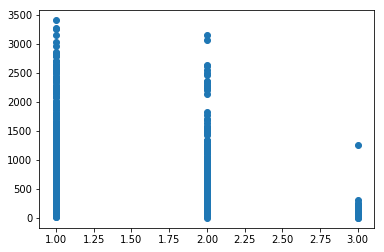

In [311]:
plt.scatter(daily['weathersit'], daily['casual'])

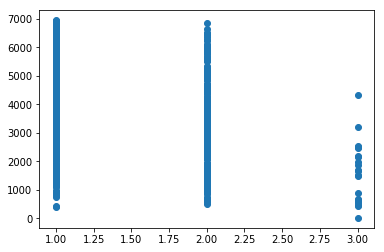

In [312]:
plt.scatter(daily['weathersit'], daily['registered'])

### Question 4.1.3.3
##### Discuss the applicability of the chosen model (causal graph from above) to this problem. Are there any variables that might missing from the causal graph? Are there any arrows that are missing?

The reason we want to do 2SLS model here is because even though we have features we want to test, there is a large probability there is some kind of confounding variable that is not independent of the features. In order to improve the model, we'd also likely want to add the features "season" and "month" -- and these two already have a direct positive correlation. And after looking at our original correlation coefficients, it can be seen that we do not need to add any other arrows.

### Question 4.1.3.4
##### If you had the opportunity to design your own study (and collect new data) to test the effect of adverse weather on the number of rentals, what would that study look like? Explain at a high level the design decisions you would make and why (keep your response to no more than 5 sentences).

If I were to create my own study, I would like to look at different instrumental variables. I would keep the overall procedure the same for each instrumental variable I test. The first instrumental variable I'd like to test is Weathersit. My current belief is that Weathersit is likely the best indicator for the count of bike rides as a feature, but actually analyzing the treatment affect could be worthwile, as the increase in weathersit likely leads to a decrease in bike rides. Also, using weekday as an instrumental variable would something I'd like to test in order to see its impact on the treatment variable. For both of these, I'd also like to add more in-depth weather data, as we could do the features from the "Weathersit" column and one-hot-encode them across our dataset to make it more granular.